In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mengimport library yang akan dipakai

In [12]:
data = pd.read_csv("audi.csv", delimiter=';')
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.04.00,1.04
1,A6,2016,16500,Automatic,36203,Diesel,20,64.02.00,2.00
2,A1,2016,11000,Manual,29946,Petrol,30,55.04.00,1.04
3,A4,2017,16800,Automatic,25952,Diesel,145,67.03.00,2.00
4,A3,2019,17300,Manual,1998,Petrol,145,49.06.00,1.00
...,...,...,...,...,...,...,...,...,...
294,Q3,2017,17298,Manual,16908,Petrol,125,51.04.00,1.04
295,A4,2017,16498,Manual,28801,Petrol,125,49.06.00,2.00
296,A4,2017,16798,Manual,23362,Petrol,145,50.04.00,1.04
297,Q5,2013,15998,Manual,50025,Petrol,235,37.07.00,2.00


Mengimport dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         299 non-null    object 
 1   year          299 non-null    int64  
 2   price         299 non-null    int64  
 3   transmission  299 non-null    object 
 4   mileage       299 non-null    int64  
 5   fuelType      299 non-null    object 
 6   tax           299 non-null    int64  
 7   mpg           299 non-null    object 
 8   engineSize    299 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 21.2+ KB


Menunjukan info detail dari dataset tadi. seperti data type, jumlah kolom dsb.

In [19]:
data = data[["year", "price"]]
data.head(10)

,year,price
0,2017,12500
1,2016,16500
2,2016,11000
3,2017,16800
4,2019,17300
5,2016,13900
6,2016,13250
7,2016,11750
8,2015,10200
9,2016,12000


Menampilkan 10 data teratas dari kolom 'year' dan 'price' dari dataset tadi. Disini saya menggunakan kolom year dan price saja karena kedua data tersebut memiliki tipe data 'int64' yang dapat dengan mudah di training, test, maupun clustering

In [33]:
data.describe()

,year,price
count,283.000000,283.000000
mean,2016.833922,19087.855124
std,1.649408,7001.439878
min,2013.000000,7000.000000
25%,2016.000000,14050.000000
50%,2017.000000,17000.000000
75%,2018.000000,23241.500000
max,2020.000000,37985.000000


Menampilkan deskripsi seperti count, mean, min, dan max dari kolom yang dipakai tadi

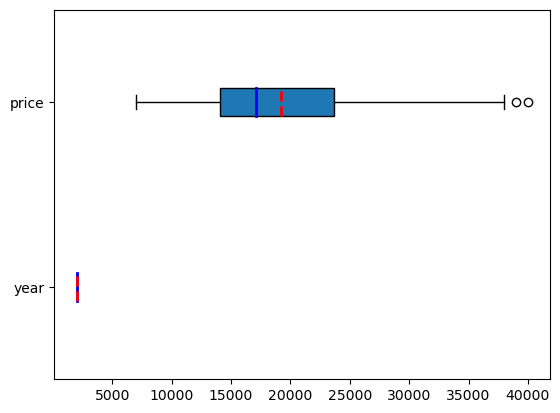

In [21]:
fig, ax = plt.subplots()
ax.boxplot(data,
          vert = False,
          showmeans = True,
          meanline = True,
          labels = ("year", "price"),
          patch_artist = True,
          medianprops = {"linewidth" : 2, "color" : "blue"},
          meanprops = {"linewidth" : 2, "color" : "red"})
plt.show()

Menampilkan outliner data sebelum dibuang

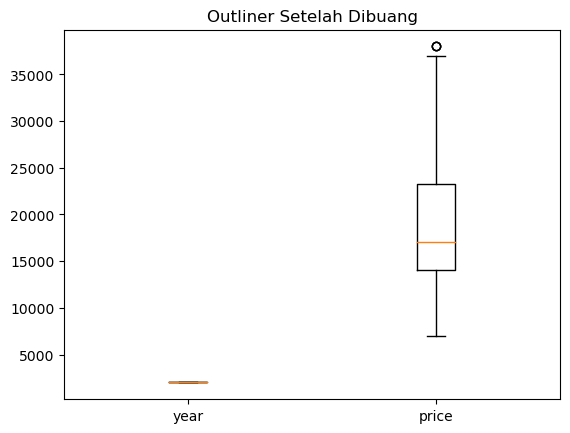

In [22]:
kolom = ["year", "price"]
Q1 = data[kolom].quantile(0.25)
Q3 = data[kolom].quantile(0.75)
IQR = Q3-Q1
data = data[~((data[kolom]<(Q1 - 1.5 * IQR)) |
             (data[kolom]>(Q3 + 1.5 *IQR))).any(axis = 1)]

plt.boxplot(data[kolom])
plt.xticks([1,2], kolom)
plt.title("Outliner Setelah Dibuang")
plt.show()

Tampilan grafik setelah outliner dibuang

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 297
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    283 non-null    int64
 1   price   283 non-null    int64
dtypes: int64(2)
memory usage: 6.6 KB


Info data dari kolom setelah beberapa outliner dibuang, terlihat ada pengurangan pada kolom 'Non-Null Count' yang awalnya 299 menjadi 283

In [35]:
x_array = np.array(data)

Merupakan cara untuk mengubah data yang berasal dari pandas DataFrame atau struktur data lainnya menjadi array NumPy

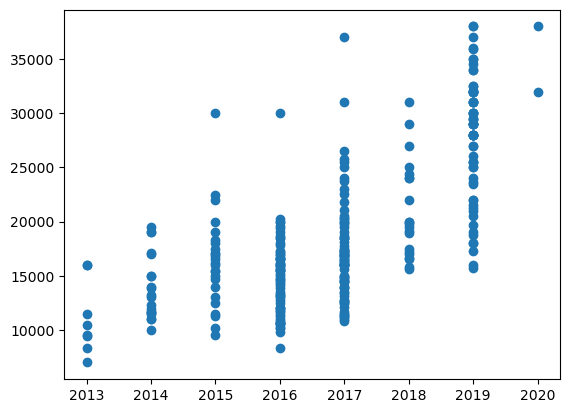

In [36]:
plt.scatter(data.year, data.price)
plt.show()

Menampilkan grafik dari data 'year' dan 'price'

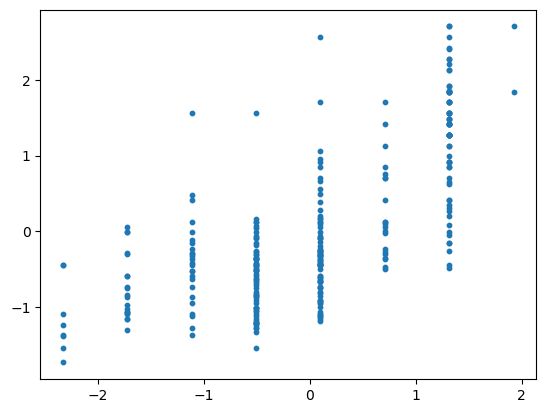

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10)
plt.show()

Menampilkan skala dari data array tadi 

In [27]:
from sklearn.cluster import KMeans
sse = []
index = range(1,10)
for i in index :
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = 'auto')
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print (i,sse_)

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


1 566.0
2 218.88430767663945


D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


3 139.65119782368663
4 100.1234395688074


D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


5 81.76282087347475
6 72.23587825828831


D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


7 61.694055778388005
8 48.48181624289936
9 42.23750606244122


D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Tujuan perintah ini untuk memvisualisasikan grafik elbow untuk memilih jumlah klaster yang optimal berdasarkan penurunan SSE

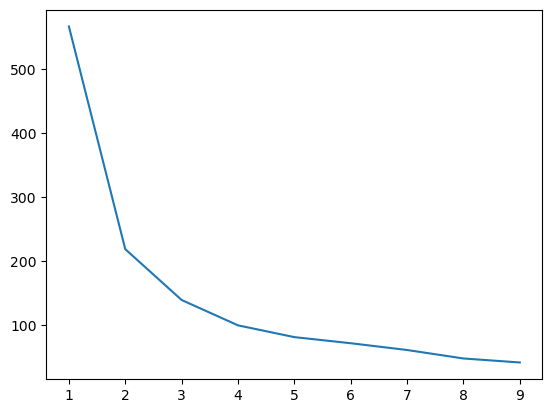

In [28]:
plt.plot(index, sse)
plt.show()

Memvisualisasikan hubungan antara nilai-nilai dalam array index dan sse sebagai grafik garis pada sumbu x dan y. Visualisasi ini juga memberi pola atau tren dalam data yang diwakili oleh 'index' dan 'sse'

In [29]:
kmeans = KMeans (n_clusters = 3, random_state = 0)
kmeans.fit (x_scaled)

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

Line ini menggunakan algoritma k-means clustering dari scikit-learn (sklearn) untuk melakukan klastering pada data yang telah di-scaling. Setelah menjalankan kedua perintah ini, model k-means (kmeans) akan terlatih dan dapat digunakan untuk melakukan prediksi atau mengevaluasi klaster yang dihasilkan dari data yang telah di-scaling (x_scaled)

In [30]:
kmeans.cluster_centers_

array([[-0.05896183, -0.4735503 ],
       [ 1.15205395,  1.35525253],
       [-1.52637753, -0.63641608]])

Menentukan nilai tengah

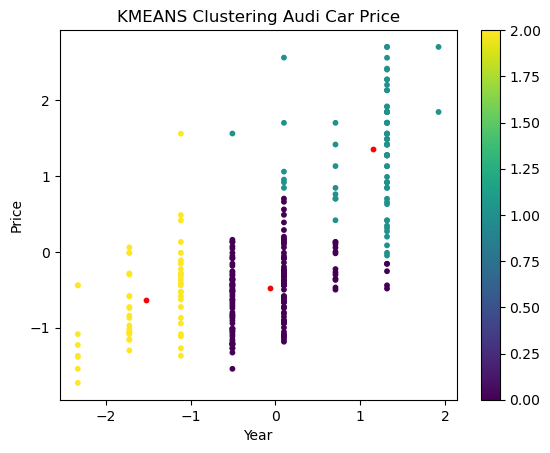

In [31]:
output = plt.scatter(x_scaled[:,0],x_scaled[:,1], s=10, c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=10)
plt.title("KMEANS Clustering Audi Car Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.colorbar(output)
plt.show()

Ini merupakan visualisasi dari data yang sudah diclustering. Titik-titik pada scatter plot mewakili data, dengan warna menunjukkan cluster yang berbeda, dan titik merah menunjukkan pusat dari setiap cluster

In [32]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

0.738358280517521

Merupakan hasil/score dari clustering yang telah dilakukan tadi. skala ini juga memberikan ukuran seberapa baik suatu clustering bekerja berdasarkan rata-rata dari rasio kesamaan antara setiap klaster dengan klaster lainnya